# CEE 498: Transportation Economics

## Assignment Two: Transit Pricing

Noah Garfinkle (garfink2@illinois.edu)

07 February 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize

# Problem 1

## Part a

In [3]:
def Q(P,α=3.0,β=0.6,c=0.8,C=1.0):
    """ 
    Calculates quantity demanded for the exponential demand function. 
  
    Defaults and units per problem one
  
    Parameters: 
    P (float): Price 
    α (float): default of 3.0
    β (float): default of 0.6
    c (float): operating cost per ride, default of 0.8
    C (float): capacity cost, default is 1.0
  
    Returns: 
    int: Description of return value 
    """
    q = np.exp(α-β*P)
    return q

In [4]:
Ps = np.linspace(0,10,100)
Qs = [Q(P) for P in Ps]
α=3.0
β=0.6
c=0.8
C=1.0

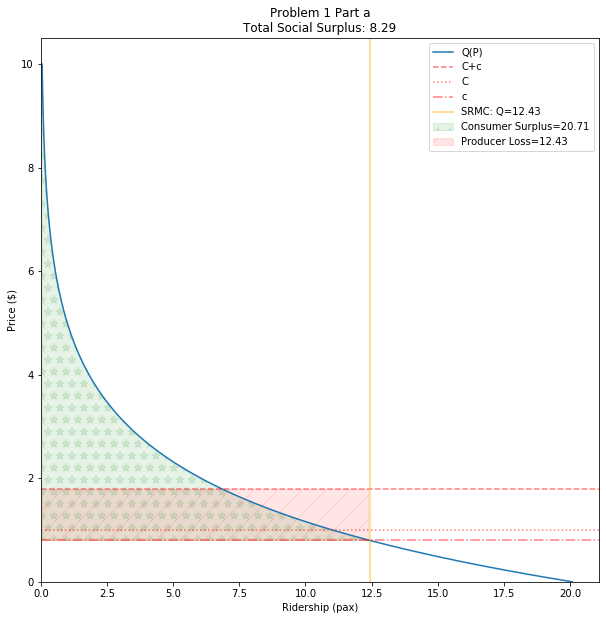

In [5]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c)
ax.axvline(Q_c,label=f"SRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, c, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')

# display the producer surplus (in this case, loss)
producerLoss = C * Q_c
ax.fill_between(Qs, c, c+C, where=Qs<Q_c, alpha=0.1,label=f"Producer Loss={producerLoss:,.2f}",color='red',hatch='/')

# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social Surplus: {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Now using inverse P to double check the graph stays the same, which it does!

In [6]:
def P(Q,α=3.0,β=0.6,c=0.8,C=1.0):
    p = (α-np.log(Q))/β
    return p

In [7]:
Qs = np.linspace(0.1,30,100)
Ps = [P(Q) for Q in Qs]

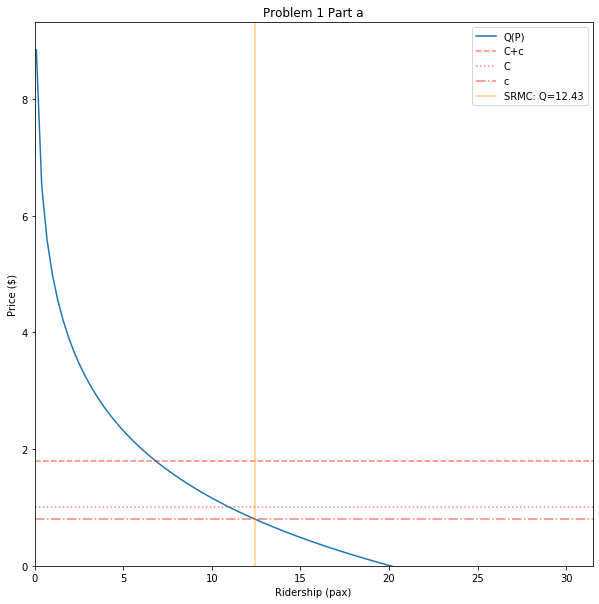

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c)
ax.axvline(Q_c,label=f"SRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [9]:
# double check math for consumer surplus
consumerSurplus - producerLoss

8.285731109051696

Repeat for P=c+C

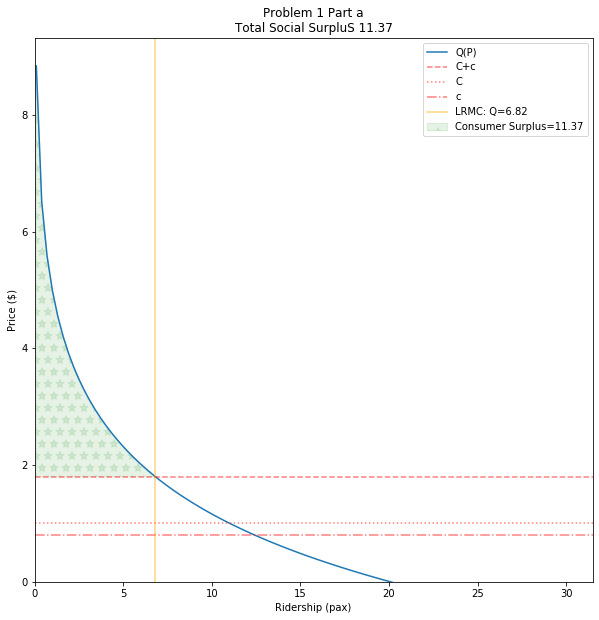

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")

ax.axhline(c+C,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(C,label="C",ls=":",alpha=0.5,color="red")
ax.axhline(c,label="c",ls="-.",alpha=0.5,color="red")

# calculate the demand when priced at short run marginal cost
Q_c = Q(c+C)
ax.axvline(Q_c,label=f"LRMC: Q={Q_c:,.2f}",color="orange",alpha=0.5)

# display the consumer surplus
consumerSurplus = Q_c/β
ax.fill_between(Qs, c+C, Ps, where=Qs<Q_c, alpha=0.1,label=f"Consumer Surplus={consumerSurplus:,.2f}",color='green',hatch='*')


# calculate total social surplus
tss = Q_c/β + (α-np.log(Q_c))/β*Q_c - (c+C)*Q_c
ax.set_title(f"Problem 1 Part a\nTotal Social SurpluS {tss:,.2f}")



ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [11]:
# double check math for consumer surplus
consumerSurplus - 0

11.368264115484584

## Part b

In [12]:
def TSS(Q,α=3.0,β=0.6,c=0.8,C=1.0):
    tss = (Q/β) + ((α-np.log(Q))/β)*Q - ((c+C)*Q)
    return tss

In [13]:
# Test by confirming for part A that TSS = CS
TSS(6.82)

11.368264003243953

In [14]:
TSS(5) # lower bound

10.921350729715833

In [15]:
TSS(10) # upper bound

10.290248450099234

# Problem 2

In [16]:
α=15.0
β=0.4
F=10.0
m0 = 0.8
m1 = 0.3

In [17]:
def Q(P,α=α,β=β):
    q = α*np.exp(-β*P)
    return q

In [18]:
def P(Q,α=α,β=β):
    p = (np.log(Q)-np.log(α))/(-β)
    return p

In [19]:
def PSimplified(Q,α=α,β=β):
    p = np.log(α/Q)/β
    return p

In [20]:
Ps = np.linspace(0.1,10,100)
Qs = [Q(P) for P in Ps]

In [21]:
Qs_i = np.linspace(0.1,10,100)
Ps_i = [P(Q) for Q in Qs_i]

In [22]:
Ps_s = [PSimplified(Q) for Q in Qs_i]

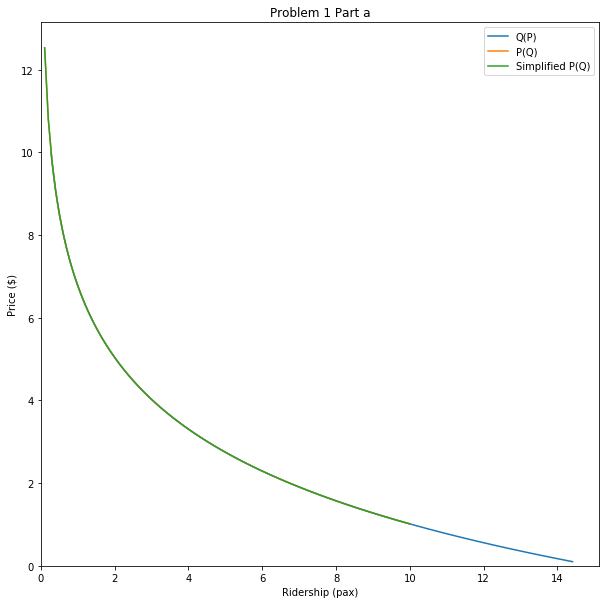

In [23]:
# the whole point of this graph is just to double check my math that all three demand curves are equivalent: staritng, inverse, and simplified inverse
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.plot(Qs_i,Ps_s,label="Simplified P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 1 Part a")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

In [24]:
def AC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    ac = (F/Q) + m0 + m1*Q
    return ac

In [25]:
def MC(Q,α=15.0,β=0.4,F=10.0,m0 = 0.8,m1=0.3):
    mc = m0 + 2*m1*Q
    return mc

In [26]:
ACs = [AC(q) for q in Qs]
MCs = [MC(q) for q in Qs]

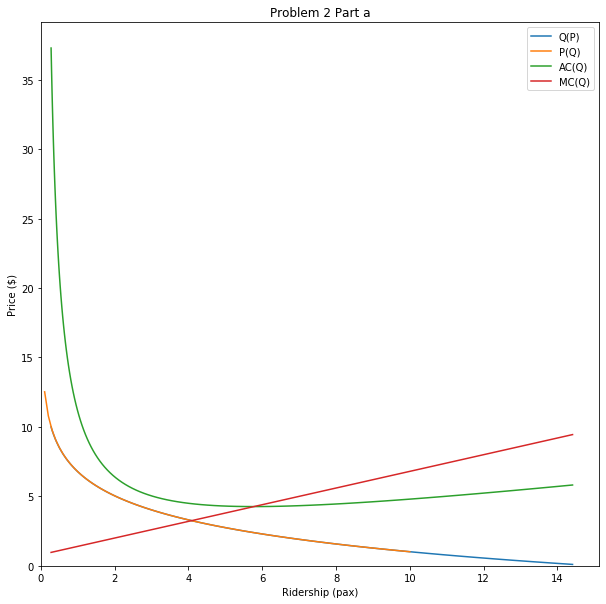

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demaand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 2 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")


# find intersections, per https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value
idx = np.argwhere(np.diff(np.sign(np.array(Ps) - np.array(MCs)))).flatten()
#ax.plot(Ps[idx[0]], MCs[idx[0]], 'ro')


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Part b

Per the marginal cost pricing rule, total social surplus is maximized with P=MC and therefore when the demand curve is intersected by the marginal cost curve.  This occurs when:
$$
\frac{\ln{\left(\frac{\alpha}{q}\right)}}{\beta}=m_0+2m_1q
$$
which can be simplified as 
$$
\ln{\left(\alpha\right)}-\ln{\left(q\right)}-\beta m_0-2\beta m_1q=0
$$

In [34]:
f = lambda q: np.log(α) - np.log(q) - β*m0 - 2*β*m1*q

In [36]:
ys = [f(q) for q in Qs]

In [42]:
res = root_scalar(f,x0=4,bracket=(3,5))
print(res)
print(res.root)
print(f(res.root)) #this is about zero

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 4.085677573993205
4.085677573993205
-5.551115123125783e-15


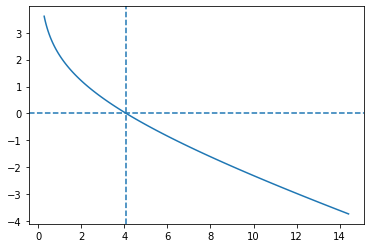

In [43]:
fig,ax = plt.subplots()
ax.plot(Qs,ys)
ax.axhline(0,ls='--')
ax.axvline(res.root,ls='--')

## Part c

In [168]:
f = lambda q: F/q + m0 + m1*q
res = minimize(lambda x: f(x[0]), x0=[5])
print(res)
print(res.x[0])

      fun: 4.264101615137761
 hess_inv: array([[9.59930498]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([5.77350233])
5.77350232555437


In [171]:
# find the price associated with this demand
p_intersect = P(res.x[0])

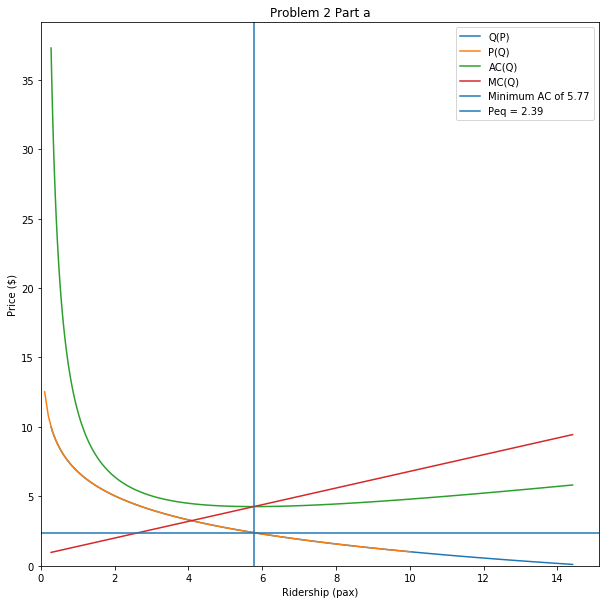

In [173]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demaand
ax.plot(Qs,Ps,label="Q(P)")
ax.plot(Qs_i,Ps_i,label="P(Q)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 2 Part a")

ax.plot(Qs,ACs,label="AC(Q)")
ax.plot(Qs,MCs,label="MC(Q)")


# plot the minimization
ax.axvline(res.x[0],label=f"Minimum AC of {res.x[0]:,.2f}")
ax.axhline(p_intersect,label=f"Peq = {p_intersect:,.2f}")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

## Part d

## Root Finding Reference

# Problem 3

In [109]:
θ=10
β=2

In [111]:
def Q(P,θ=θ,β=β):
    q = θ*np.exp(-β*P)
    return q

In [116]:
Ps = np.linspace(0,10,100)
Qs_pt5 = [Q(P,θ=0.5) for P in Ps]
Qs_1 = [Q(P,θ=1.0) for P in Ps]
Qs_1pt5 = [Q(P,θ=1.5) for P in Ps]
Qs_2 = [Q(P,θ=2.0) for P in Ps]

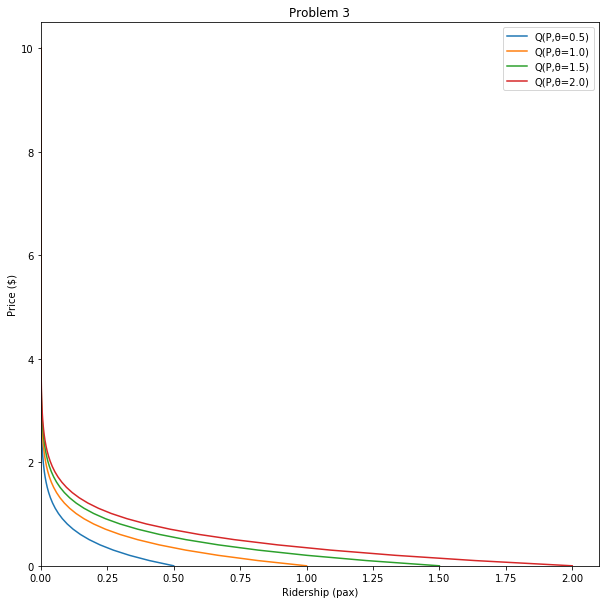

In [117]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(Qs_pt5,Ps,label="Q(P,θ=0.5)")
ax.plot(Qs_1,Ps,label="Q(P,θ=1.0)")
ax.plot(Qs_1pt5,Ps,label="Q(P,θ=1.5)")
ax.plot(Qs_2,Ps,label="Q(P,θ=2.0)")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3")


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()

# Problem 4

# Problem 5

$$
L=\frac{\alpha e^{-\beta P}}{\beta}+\left(1+\lambda\right)\left(\frac{\ln{\left(\frac{\alpha}{\alpha e^{-\beta P}}\right)}}{\beta}-f_i-c_i\alpha e^{-\beta P}\right)
$$